# 回帰分析とは (単回帰と重回帰)

## 単回帰
単回帰とは、教師あり学習の一種で、1つの説明変数を用いて目的変数（実数値）を予測する手法です。

In [1]:
x = [[12],[16],[20],[28],[36]]
y = [[700],[900],[1300],[1750],[1800]]

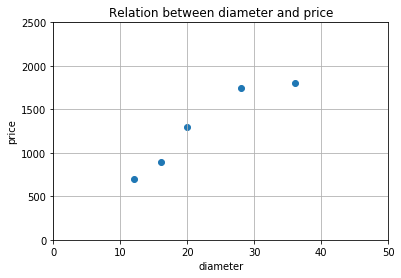

In [2]:
import matplotlib.pyplot as plt

 # テキストエディタで実行する場合はこの行をコメントアウト(コメント化)してください。
%matplotlib inline

plt.figure()
plt.title('Relation between diameter and price') #タイトル
plt.xlabel('diameter') #軸ラベル
plt.ylabel('price') #軸ラベル
plt.scatter(x,y) #散布図の作成
plt.axis([0, 50, 0, 2500]) #表の最小値、最大値
plt.grid(True) #grid線
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
import numpy as np
# scikit-learnの最近のバージョンでは、predictに使うデータをreshape(-1,1)を用いる必要があります。
# reshape(-1,1)により、2次元の縦ベクトルに変換しています。
# 一方で、.reshape(1, -1)を使うと横ベクトルになりますが、今回の場合はreshape(-1,1)で縦ベクトルにすることで予測が出来るようになります。
price = model.predict(np.array([25]).reshape(-1, 1)) # Google Colabなどでskleran.0.20系ご利用の方
# price = model.predict(25) # scikit-learnバージョン0.1.9系　# price = model.predict([[25]])
print('25 cm pizza should cost: $%s'%price[0][0])

25 cm pizza should cost: $1416.918103448276


In [7]:
# テストデータを作成
x_test = [[16],[18],[22],[32],[24]]
y_test = [[1100],[850],[1500],[1800],[1100]]

score = model.score(x_test, y_test)
print("r-squared:",score)

r-squared: 0.662005292942255


## 重回帰

In [8]:
x = [[12,2],[16,1],[20,0],[28,2],[36,0]]
y = [[700],[900],[1300],[1750],[1800]]

model = LinearRegression()
model.fit(x,y)

x_test = [[16,2],[18,0],[22,2],[32,2],[24,0]]
y_test = [[1100],[850],[1500],[1800],[1100]]

# prices = model.predict([[16, 2], [18, 0], [22, 2], [32, 2], [24, 0]])
prices = model.predict(x_test) # 上のコメントと同じ

# Pythonの標準関数であるenumerate関数は、リストのインデックスと要素を同時に取得できます。
# この関数により、iにはインデックスが代入され、priceには予測されたインデックスに対応する価格を受け取っています。
for i, price in enumerate(prices):
    print('Predicted:%s, Target:%s'%(price,y_test[i]))

score = model.score(x_test,y_test)
print("r-squared:",score)

Predicted:[1006.25], Target:[1100]
Predicted:[1028.125], Target:[850]
Predicted:[1309.375], Target:[1500]
Predicted:[1814.58333333], Target:[1800]
Predicted:[1331.25], Target:[1100]
r-squared: 0.7701677731318466


## ラッソ回帰とリッジ回帰

In [9]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [16]:
boston = load_boston()

x = boston.data
y = boston.target

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=123)

model1 = Lasso()
model1.fit(x_train, y_train)

pred = model1.predict(x_test)
r2_score(y_test, pred)

0.6554460628881655

In [15]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

boston = load_boston()

x = boston.data
y = boston.target

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=123)

model2 = Ridge()
model2.fit(x_train, y_train)

pred = model2.predict(x_test)
r2_score(y_test, pred)

0.6775930475897152

In [17]:
model = LinearRegression()
model.fit(x_train, y_train)

pred = model.predict(x_test)
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)

print("LinearRegression: ", r2_score(y_test, pred))
print("Lasso: ", r2_score(y_test, pred1))
print("Ridge: ",r2_score(y_test, pred2))

LinearRegression:  0.6862448857295773
Lasso:  0.6554460628881655
Ridge:  0.6775930475897152


LinearRegression:  0.7789410172622865
Lasso:  0.6621980770523261
Ridge:  0.784777431688241


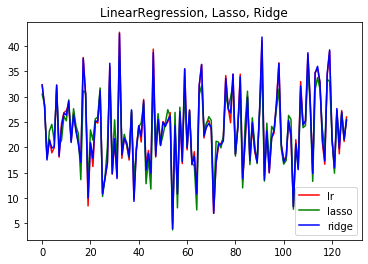

In [18]:
from sklearn.linear_model import  LinearRegression, Lasso, Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

boston = load_boston()

x = boston.data
y = boston.target

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1)

model = LinearRegression()
model.fit(x_train, y_train)

model1 = Lasso()
model1.fit(x_train, y_train)

model2 = Ridge()
model2.fit(x_train, y_train)

pred = model.predict(x_test)
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)

print("LinearRegression: ", r2_score(y_test, pred))
print("Lasso: ", r2_score(y_test, pred1))
print("Ridge: ",r2_score(y_test, pred2))

plt.plot(model.predict(x_test), linestyle="solid", 
         color="red",label="lr")
plt.plot(model1.predict(x_test), linestyle="solid", 
         color="green", label="lasso")
plt.plot(model2.predict(x_test), linestyle="solid", 
         color="blue", label='ridge')
plt.title("LinearRegression, Lasso, Ridge")
plt.legend()
plt.show()